Imporrting Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


Load Data

In [5]:
import pandas as pd

# CCLE multi-omics features
ccle = pd.read_excel(r"Datasets\Cell_Lines.xlsx")  # using raw string for Windows path

# GDSC drug response
gdsc1 = pd.read_excel(r"Datasets\GDSC1.xlsx")
gdsc2 = pd.read_excel(r"Datasets\GDSC2.xlsx")

# inspect first few rows
print(ccle.head())
print(gdsc1.head())
print(gdsc2.head())


c:\Users\LENOVO X1 CARBAN\Desktop\multiomics\venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


  Sample Name  COSMIC identifier Whole Exome Sequencing (WES)  \
0        A253           906794.0                            Y   
1    BB30-HNC           753531.0                            Y   
2    BB49-HNC           753532.0                            Y   
3         BHY           753535.0                            Y   
4      BICR10          1290724.0                            Y   

  Copy Number Alterations (CNA) Gene Expression Methylation Drug\nResponse  \
0                             Y               Y           Y              Y   
1                             Y               Y           Y              Y   
2                             Y               Y           Y              Y   
3                             Y               Y           Y              Y   
4                             Y               Y           Y              Y   

  GDSC\nTissue descriptor 1 GDSC\nTissue\ndescriptor 2  \
0            aero_dig_tract              head and neck   
1            aero_dig_tr

Merging two datasets (GDSC1 & GDSC2) with Cell_Lines

In [6]:
# merge on COSMIC_ID or CELL_LINE_NAME
merged_gdsc1 = pd.merge(gdsc1, ccle, left_on='COSMIC_ID', right_on='COSMIC identifier', how='inner')
merged_gdsc2 = pd.merge(gdsc2, ccle, left_on='COSMIC_ID', right_on='COSMIC identifier', how='inner')


Visulization

C:\Users\LENOVO X1 CARBAN\AppData\Local\Temp\ipykernel_15772\1746858721.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_drugs.index, x=top_drugs.values, palette='viridis')


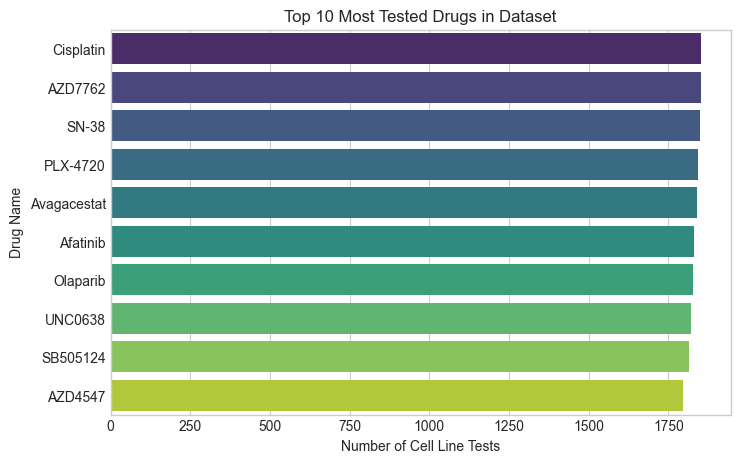

C:\Users\LENOVO X1 CARBAN\AppData\Local\Temp\ipykernel_15772\1746858721.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cancers.index, x=top_cancers.values, palette='magma')


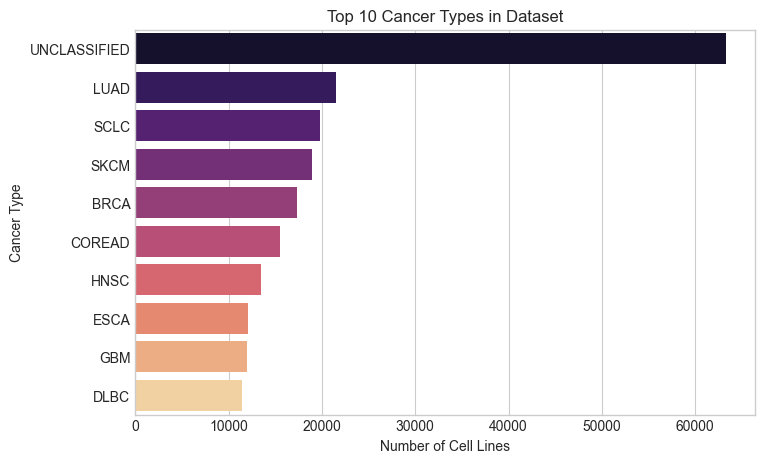

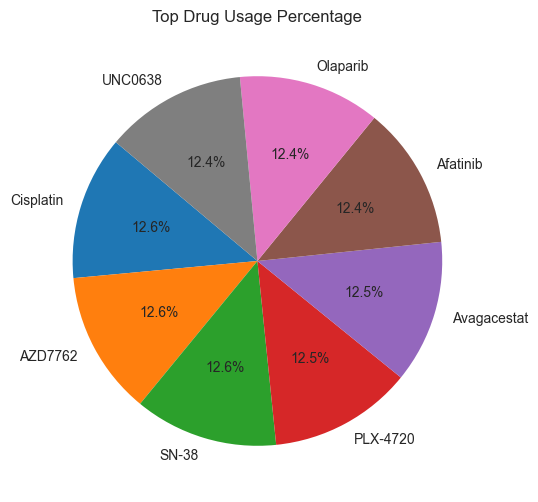

C:\Users\LENOVO X1 CARBAN\AppData\Local\Temp\ipykernel_15772\1746858721.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_drugs.index, x=top_drugs.values, ax=axes[0], palette='plasma')
C:\Users\LENOVO X1 CARBAN\AppData\Local\Temp\ipykernel_15772\1746858721.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cancers.index, x=top_cancers.values, ax=axes[1], palette='coolwarm')


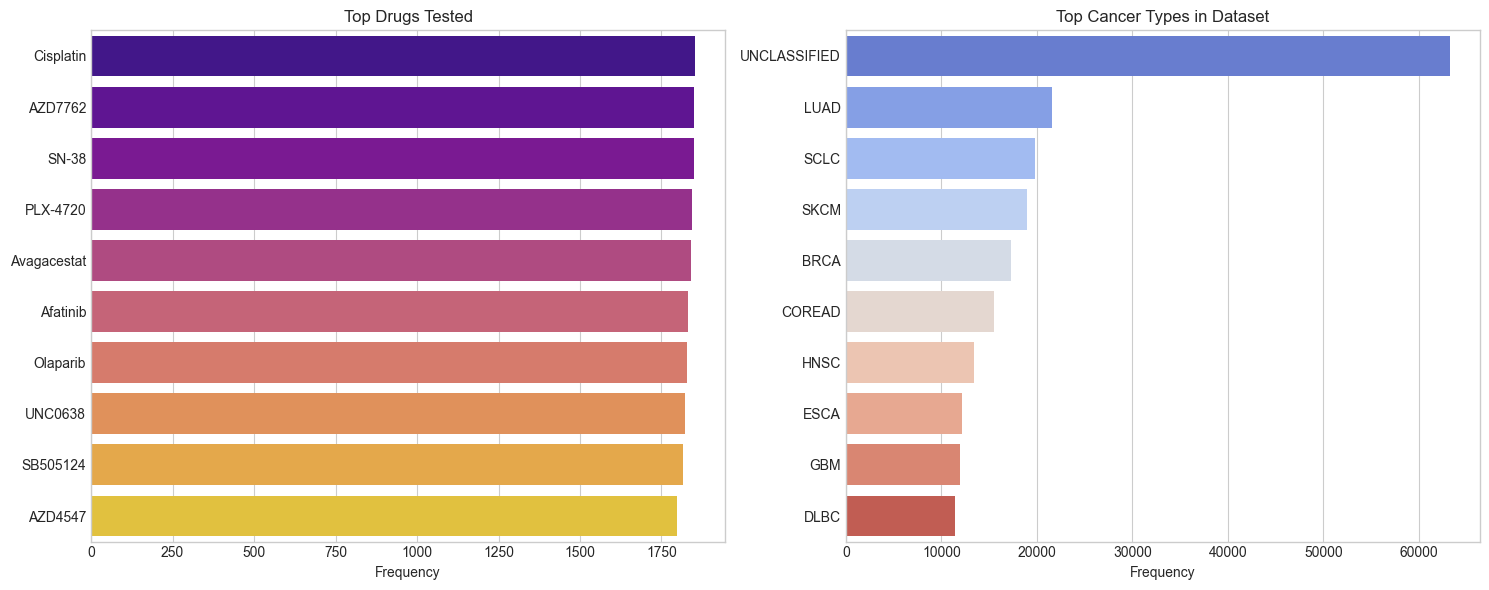

In [21]:
# Step 4 – Exploratory Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# use your dataframe (replace if needed)
data = merged_gdsc1  # or merged_gdsc2 / combined_data

plt.style.use('seaborn-v0_8-whitegrid')

# --- Top 10 most used drugs ---
plt.figure(figsize=(8,5))
top_drugs = data['DRUG_NAME'].value_counts().head(10)
sns.barplot(y=top_drugs.index, x=top_drugs.values, palette='viridis')
plt.title("Top 10 Most Tested Drugs in Dataset")
plt.xlabel("Number of Cell Line Tests")
plt.ylabel("Drug Name")
plt.show()

# --- Top 10 cancer types ---
plt.figure(figsize=(8,5))
top_cancers = data['TCGA_DESC'].value_counts().head(10)
sns.barplot(y=top_cancers.index, x=top_cancers.values, palette='magma')
plt.title("Top 10 Cancer Types in Dataset")
plt.xlabel("Number of Cell Lines")
plt.ylabel("Cancer Type")
plt.show()

# --- Drugs by percentage ---
plt.figure(figsize=(6,6))
drug_percent = (data['DRUG_NAME'].value_counts().head(8) / len(data)) * 100
plt.pie(drug_percent, labels=drug_percent.index, autopct='%1.1f%%', startangle=140)
plt.title("Top Drug Usage Percentage")
plt.show()

# --- Subplots: overall view ---
fig, axes = plt.subplots(1, 2, figsize=(15,6))

sns.barplot(y=top_drugs.index, x=top_drugs.values, ax=axes[0], palette='plasma')
axes[0].set_title("Top Drugs Tested")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("")

sns.barplot(y=top_cancers.index, x=top_cancers.values, ax=axes[1], palette='coolwarm')
axes[1].set_title("Top Cancer Types in Dataset")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


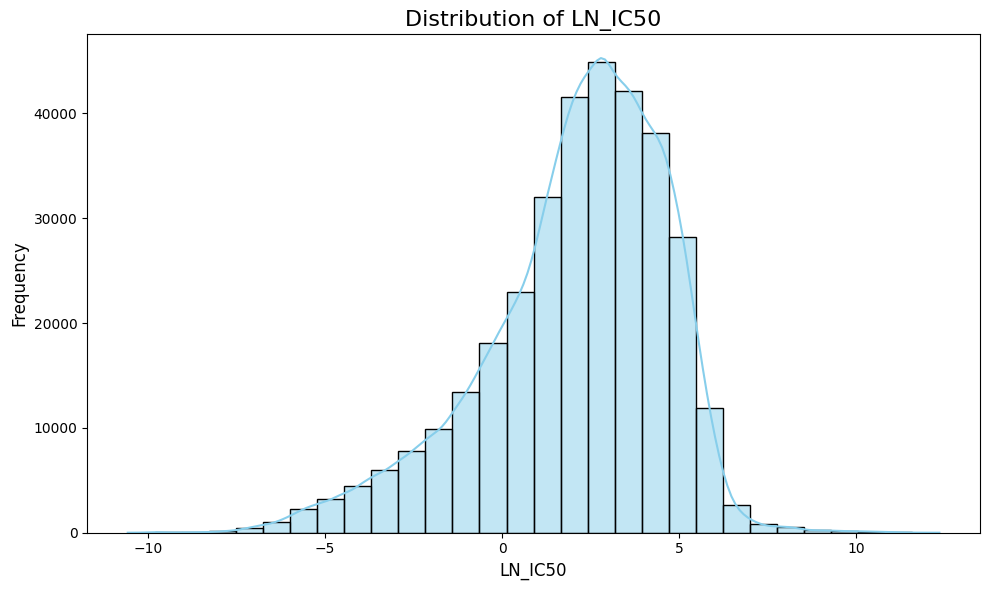

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------- Distribution of IC50 ----------
plt.figure(figsize=(10, 6))
sns.histplot(merged_gdsc1['LN_IC50'].dropna(), kde=True, color='skyblue', bins=30)
plt.title("Distribution of LN_IC50", fontsize=16)
plt.xlabel("LN_IC50", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

# ---------- Correlation Heatmap of CCLE numeric features ----------
# numeric_cols = ccle.select_dtypes(include='number')

# if numeric_cols.shape[1] == 0:
#     print("No numeric columns found in CCLE dataset for correlation heatmap.")
# else:
#     # Compute correlation and mask the upper triangle
#     corr = numeric_cols.corr()
#     mask = np.triu(np.ones_like(corr, dtype=bool))

#     plt.figure(figsize=(12, 10))
#     sns.heatmap(
#         corr, 
#         mask=mask, 
#         cmap="coolwarm", 
#         annot=True, 
#         fmt=".2f", 
#         linewidths=0.5, 
#         cbar_kws={"shrink": 0.8},
#         square=True
#     )
    # plt.title("Correlation between Omics Features (CCLE)", fontsize=16)
    # plt.xticks(rotation=45, ha='right')
    # plt.yticks(rotation=0)
    # plt.tight_layout()
    # plt.show()


Preparing input(x) and output(y) data

In [10]:
# select numeric omics features
X = merged_gdsc1.select_dtypes(include=np.number).drop(columns=['LN_IC50','AUC','RMSE','Z_SCORE'])
y = merged_gdsc1['LN_IC50']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Building Neural Network Model

In [11]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1)  # regression output for LN_IC50
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\LENOVO X1 CARBAN\Desktop\multiomics\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the Model

In [12]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)


Epoch 1/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 57s 8ms/step - loss: 4.9767 - mae: 1.7790 - val_loss: 4.7339 - val_mae: 1.6940
Epoch 2/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 86s 13ms/step - loss: 4.3950 - mae: 1.6800 - val_loss: 4.1676 - val_mae: 1.6433
Epoch 3/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 82s 12ms/step - loss: 4.2694 - mae: 1.6537 - val_loss: 4.1209 - val_mae: 1.6466
Epoch 4/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 78s 12ms/step - loss: 4.1901 - mae: 1.6357 - val_loss: 4.0260 - val_mae: 1.6097
Epoch 5/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 47s 6ms/step - loss: 4.1099 - mae: 1.6192 - val_loss: 3.9984 - val_mae: 1.6109
Epoch 6/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 46s 7ms/step - loss: 4.0680 - mae: 1.6099 - val_loss: 3.9058 - val_mae: 1.5817
Epoch 7/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - loss: 4.0248 - mae: 1.6000 - val_loss: 3.8497 - val_mae: 1.5753
Epoch 8/100
6664/6664 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - loss: 3.9788 - mae: 1.5903 - val_loss: 3.7958 - val_mae: 1.5612
Epoch 9/100
6664/6664

Visulization of Training History

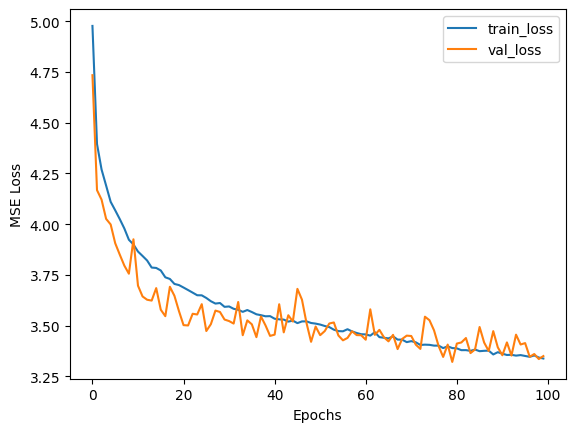

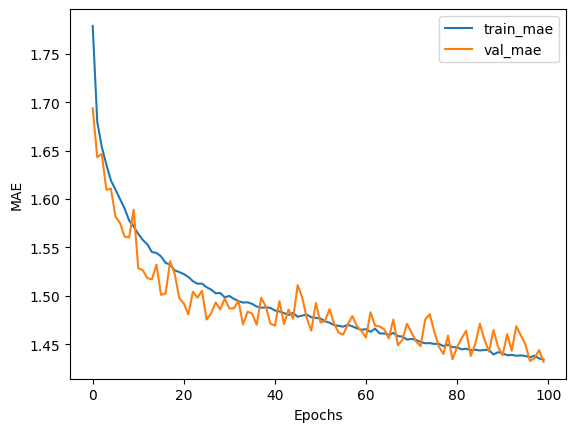

In [14]:
# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# MAE
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()


Evaluating Model

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R2:", r2)


2083/2083 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Test MSE: 3.3169843936668753
Test R2: 0.5057208388519402


Predictiong Patients Data

In [17]:
# Predict IC50 for test samples (simulate patient prediction)
y_pred = model.predict(X_test)

# Compare with actual
r2 = r2_score(y_test, y_pred)
print("Model Accuracy (R2):", round(r2 * 100, 2), "%")

# show a few predictions
results = pd.DataFrame({'Actual_IC50': y_test[:10], 'Predicted_IC50': y_pred[:10].flatten()})
print(results)


2083/2083 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Model Accuracy (R2): 50.57 %
        Actual_IC50  Predicted_IC50
34043      1.476003        2.933218
271097     4.114941        3.122464
74490      3.556466        3.490314
293166     3.111808        2.606311
332114     4.932949        4.148712
99172      3.590363        1.991149
274527     2.743642        3.051491
247239     3.231801        3.202538
98201      4.366367        3.229276
128975     0.828223        3.336597
